## **Importing the dataset**

In [115]:
import pandas as pd

df = pd.read_csv("Iris.csv")

#Define features and targets
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [16]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

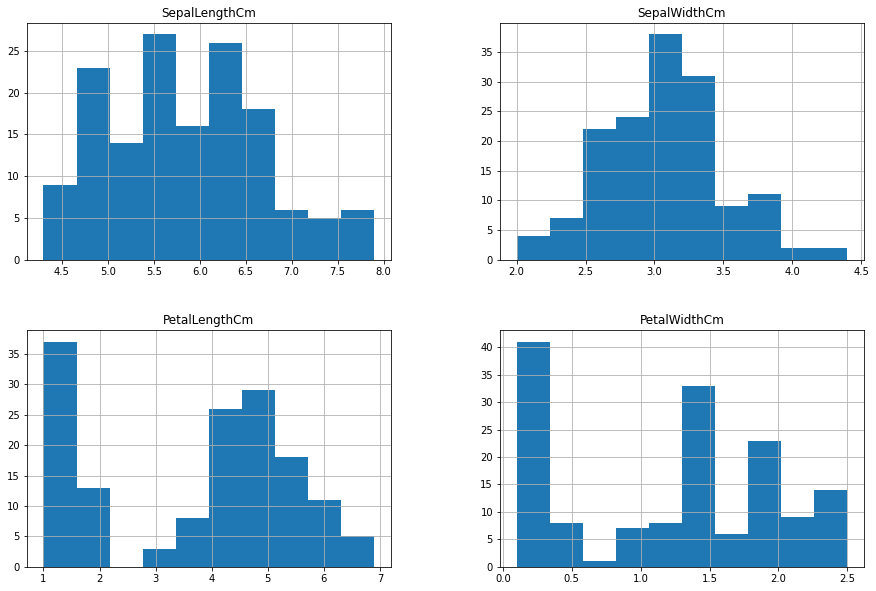

In [17]:
X.hist(figsize=(15,10))

## **Preparing data for training**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True) 

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini",random_state=None)
model.fit(X_train,y_train)
print("Training Complete")

Training Complete


## **Model Evaluation**

In [114]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")

Accuracy Score: 93.33333333333333%


In [112]:
sample = X_test.sample()
pred = model.predict(sample)
print(pred)
print(y_test[sample.index])

['Iris-virginica']
127    Iris-virginica
Name: Species, dtype: object


*As seen above, the model is able to predict correctly the specie of any newly given flower.*

## **Drawing a visual representation of the tree**

[Text(0.5, 0.9, 'PetalLength <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'PetalWidth <= 1.75\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(0.3076923076923077, 0.5, 'PetalLength <= 4.95\ngini = 0.194\nsamples = 46\nvalue = [0, 41, 5]'),
 Text(0.15384615384615385, 0.3, 'SepalLength <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.46153846153846156, 0.3, 'PetalWidth <= 1.65\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8461538461538461, 0.5, 'PetalLength <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 T

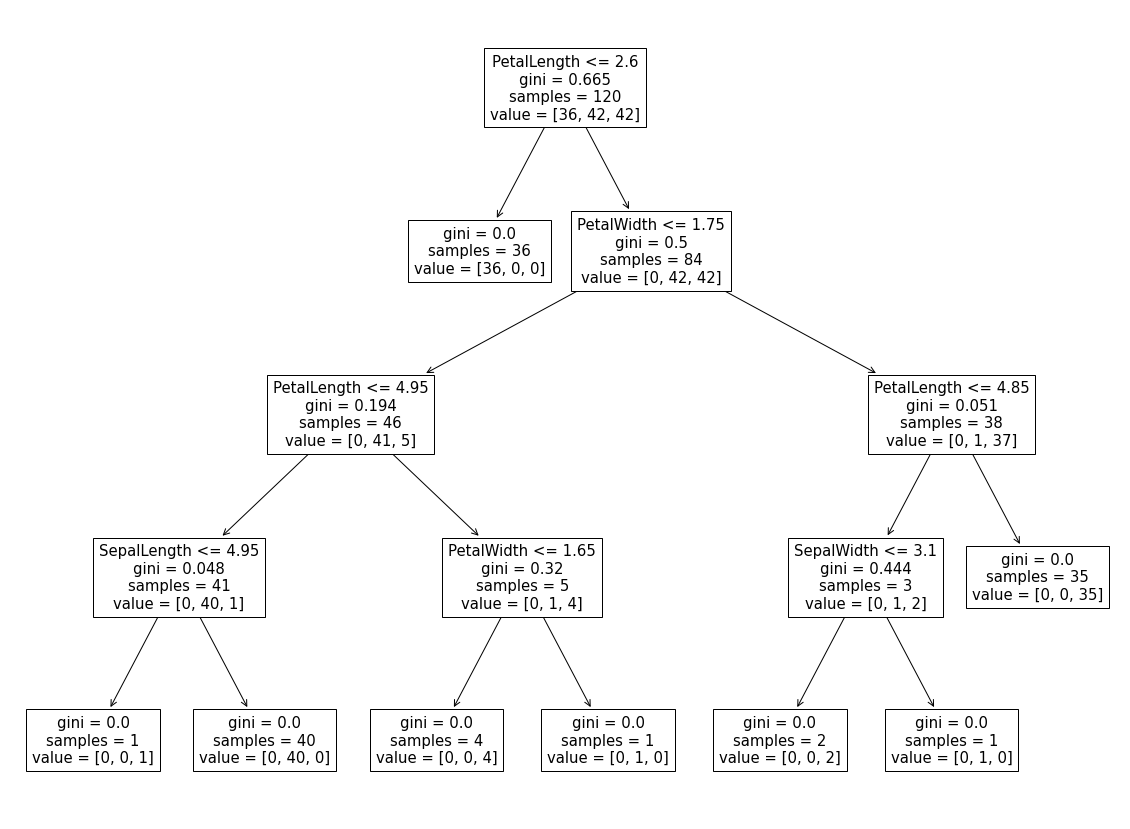

In [21]:
import matplotlib.pyplot as plt
#Plotting the tree

from sklearn.tree import plot_tree
plt.figure(figsize=[20,15])
plot_tree(model,feature_names=['SepalLength','SepalWidth','PetalLength','PetalWidth'])